In [72]:
import pandas as pd
import seaborn as sns

In [73]:
df = pd.read_csv('../../shared_data/processed/merged_data.csv', low_memory=False)

In [74]:
TASKS_WITH_TEXT = [
    'intimacy', 
    'politeness', 
    'offensiveness',
    'diaz'
]

df_text = df[df['task'].isin(TASKS_WITH_TEXT)].copy()

In [75]:
df_text.columns

Index(['instance_id', 'text', 'user_id', 'gender', 'age', 'race', 'education',
       'label', 'labels', 'task', 'instance_split', 'user_split', 'bad_users'],
      dtype='object')

## Overall unqiue counts

Ratings

In [76]:
df_text.groupby('task')[['label']].count()

,label
task,
diaz,60654
intimacy,12516
offensiveness,13036
politeness,25042


Instances

In [77]:
df_text.groupby(['task'])[['instance_id']].nunique()

,instance_id
task,
diaz,14071
intimacy,1993
offensiveness,1500
politeness,3718


Annotators

In [78]:
df_text.groupby(['task'])[['user_id']].nunique()

,user_id
task,
diaz,1481
intimacy,261
offensiveness,262
politeness,506


## Ratings per Instance

count - numbers of instances

mean/min/max - number of annotations per instance

In [79]:
df_text.groupby(['task', 'instance_id']).count()['label'].groupby(['task']).describe()

,count,mean,std,min,25%,50%,75%,max
task,,,,,,,,
diaz,14071.0,4.310568,0.812343,4.0,4.0,4.0,4.0,12.0
intimacy,1993.0,6.279980,0.956843,1.0,6.0,7.0,7.0,7.0
offensiveness,1500.0,8.690667,0.891914,5.0,8.0,9.0,9.0,10.0
politeness,3718.0,6.735342,0.714502,3.0,6.0,7.0,7.0,8.0


#### Instance Split

In [80]:
df_text.groupby(['task', 'instance_split', 'instance_id']).count()['label'].reset_index().groupby(['task', 'instance_split']).describe()

label                                          \
                               count      mean       std  min  25%  50%  75%   
task          instance_split                                                   
diaz          test            2815.0  4.310124  0.789110  4.0  4.0  4.0  4.0   
              train           9849.0  4.317088  0.826472  4.0  4.0  4.0  4.0   
              val             1407.0  4.265814  0.755532  4.0  4.0  4.0  4.0   
intimacy      test             399.0  6.240602  0.983408  1.0  6.0  6.0  7.0   
              train           1395.0  6.296774  0.950397  1.0  6.0  7.0  7.0   
              val              199.0  6.241206  0.949274  2.0  6.0  6.0  7.0   
offensiveness test             300.0  8.700000  0.927109  6.0  8.0  9.0  9.0   
              train           1050.0  8.708571  0.883501  5.0  8.0  9.0  9.0   
              val              150.0  8.546667  0.871523  6.0  8.0  9.0  9.0   
politeness    test             744.0  6.719086  0.668750  4.0  6.0  7.0  7.0   
              train           2602.0  6.734819  0.722842  3.0  6.0  7.0  7.0   
              val              372.0  6.771505  0.744391  4.0  6.0  7.0  7.0   

                                    
                               max  
task          instance_split        
diaz          test            10.0  
              train           12.0  
              val             10.0  
intimacy      test             7.0  
              train            7.0  
              val              7.0  
offensiveness test            10.0  
              train           10.0  
              val             10.0  
politeness    test             8.0  
              train            8.0  
              val              8.0

#### User Split


In [81]:
df_text.groupby(['task', 'user_split', 'instance_id']).count()['label'].reset_index().groupby(['task', 'user_split']).describe()

label                                          \
                            count      mean       std  min  25%  50%  75%   
task          user_split                                                    
diaz          test         9017.0  1.348786  0.589210  1.0  1.0  1.0  2.0   
              train       13991.0  3.031449  1.012155  1.0  2.0  3.0  4.0   
              val          5116.0  1.188233  0.453019  1.0  1.0  1.0  1.0   
intimacy      test         1508.0  1.684350  0.826627  1.0  1.0  1.0  2.0   
              train        1991.0  4.371170  1.283193  1.0  4.0  4.0  5.0   
              val           997.0  1.276830  0.506578  1.0  1.0  1.0  1.0   
offensiveness test         1274.0  2.069074  1.006624  1.0  1.0  2.0  3.0   
              train        1500.0  6.070000  1.457343  2.0  5.0  6.0  7.0   
              val           914.0  1.416849  0.636754  1.0  1.0  1.0  2.0   
politeness    test         2914.0  1.730268  0.859508  1.0  1.0  2.0  2.0   
              train        3718.0  4.710866  1.286316  1.0  4.0  5.0  6.0   
              val          1872.0  1.327457  0.568301  1.0  1.0  1.0  2.0   

                                
                           max  
task          user_split        
diaz          test         6.0  
              train       10.0  
              val          6.0  
intimacy      test         5.0  
              train        7.0  
              val          3.0  
offensiveness test         6.0  
              train       10.0  
              val          4.0  
politeness    test         5.0  
              train        8.0  
              val          4.0

## Ratings per User

count - numbers of annotators

mean/min/max - number of annotations per annotator

In [82]:
df_text.groupby(['task', 'user_id']).count()['label'].groupby(['task']).describe()

,count,mean,std,min,25%,50%,75%,max
task,,,,,,,,
diaz,1481.0,40.954760,0.988436,40.0,40.0,41.0,42.0,44.0
intimacy,261.0,47.954023,6.862229,14.0,47.0,49.0,50.0,99.0
offensiveness,262.0,49.755725,0.871794,40.0,50.0,50.0,50.0,50.0
politeness,506.0,49.490119,1.501452,36.0,50.0,50.0,50.0,50.0


#### Instance Split

count - numbers of annotators in each split

mean/min/max - number of annotations per annotator

In [83]:
df_text.groupby(['task', 'instance_split', 'user_id']).count()['label'].reset_index().groupby(['task', 'instance_split']).describe()

label                                          \
                               count       mean       std   min    25%   50%   
task          instance_split                                                   
diaz          test            1481.0   8.192438  2.592108   2.0   7.00   8.0   
              train           1481.0  28.709656  3.250691  18.0  27.00  29.0   
              val             1447.0   4.147892  1.840521   1.0   3.00   4.0   
intimacy      test             261.0   9.540230  2.923925   1.0   8.00   9.0   
              train            261.0  33.655172  5.678219  10.0  31.00  34.0   
              val              260.0   4.776923  2.614971   1.0   3.00   4.0   
offensiveness test             262.0   9.961832  2.636044   3.0   8.00  10.0   
              train            262.0  34.900763  3.055941  25.0  33.00  35.0   
              val              262.0   4.893130  2.012421   1.0   4.00   5.0   
politeness    test             506.0   9.879447  2.606027   2.0   8.00  10.0   
              train            506.0  34.632411  3.412159  24.0  33.00  35.0   
              val              500.0   5.038000  2.159139   1.0   3.75   5.0   

                                           
                                75%   max  
task          instance_split               
diaz          test            10.00  17.0  
              train           31.00  38.0  
              val              5.00  11.0  
intimacy      test            11.00  19.0  
              train           36.00  72.0  
              val              6.00  19.0  
offensiveness test            12.00  18.0  
              train           37.00  43.0  
              val              6.00  12.0  
politeness    test            11.75  18.0  
              train           37.00  43.0  
              val              6.00  11.0

#### User Split

count - numbers of annotators in each split

mean/min/max - number of annotations per annotator

In [84]:
df_text.groupby(['task', 'user_split', 'user_id']).count()['label'].reset_index().groupby(['task', 'user_split']).describe()

label                                          \
                           count       mean        std   min   25%   50%   
task          user_split                                                   
diaz          test         297.0  40.949495   1.010490  40.0  40.0  41.0   
              train       1036.0  40.939189   0.979583  40.0  40.0  41.0   
              val          148.0  41.074324   1.004014  40.0  40.0  41.0   
intimacy      test          53.0  47.924528   2.234769  42.0  47.0  48.0   
              train        182.0  47.818681   7.022858  14.0  47.0  49.0   
              val           26.0  48.961538  11.003566  34.0  47.0  48.5   
offensiveness test          53.0  49.735849   0.858239  45.0  50.0  50.0   
              train        183.0  49.754098   0.919670  40.0  50.0  50.0   
              val           26.0  49.807692   0.491466  48.0  50.0  50.0   
politeness    test         102.0  49.431373   1.389564  43.0  50.0  50.0   
              train        354.0  49.477401   1.584556  36.0  50.0  50.0   
              val           50.0  49.700000   1.054630  43.0  50.0  50.0   

                                      
                           75%   max  
task          user_split              
diaz          test        42.0  44.0  
              train       42.0  44.0  
              val         42.0  44.0  
intimacy      test        50.0  50.0  
              train       50.0  98.0  
              val         50.0  99.0  
offensiveness test        50.0  50.0  
              train       50.0  50.0  
              val         50.0  50.0  
politeness    test        50.0  50.0  
              train       50.0  50.0  
              val         50.0  50.0

## Train-Test Overlap

Number of Ratings on Instances in User Splits

In [85]:
train_ids = df_text[df_text['user_split'] == 'train'].groupby('task')[['instance_id']].agg(lambda x: list(x))

In [86]:
train_ids

,instance_id
task,
diaz,"[diaz_1350, diaz_1333, diaz_1335, diaz_1320, d..."
intimacy,"[intimacy_432, intimacy_197, intimacy_388, int..."
offensiveness,"[offensiveness_530, offensiveness_1280, offens..."
politeness,"[politeness_3104, politeness_2888, politeness_..."


In [102]:
df_text['in_user_train'] = df_text[df_text['user_split'] == 'test'] \
.apply(lambda row: row['instance_id'] in train_ids['instance_id'].loc[row['task']], axis = 1)

Number of ratings in the user test sets

In [101]:
df_text[df_text['user_split'] == 'test'].groupby('task')['instance_id'].count()

task
diaz             12162
intimacy          2540
offensiveness     2636
politeness        5042
Name: instance_id, dtype: int64

Number of ratings in the user test sets on instances that *also appear in the train set*

In [96]:
df_text.groupby('task')['in_user_train'].sum()

task
diaz             11957
intimacy          2531
offensiveness     2636
politeness        5042
Name: in_user_train, dtype: object

## Label Distribution

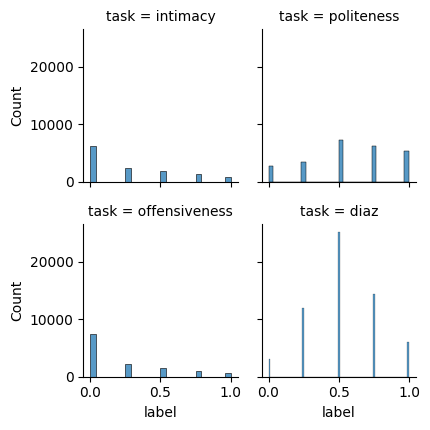

In [88]:
g = sns.FacetGrid(df_text, col="task", col_wrap=2, height=2.2)
g.map(sns.histplot, "label")

### Label Distributions per Task and Split

Nothing unusual based on exameplary analysis (politeness below, also looked at intimacy)

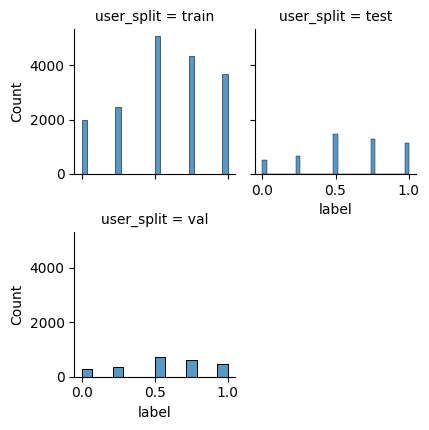

In [89]:
g = sns.FacetGrid(df_text[df_text['task'] == 'politeness'], col="user_split", col_wrap=2, height=2.2)
g.map(sns.histplot, "label")

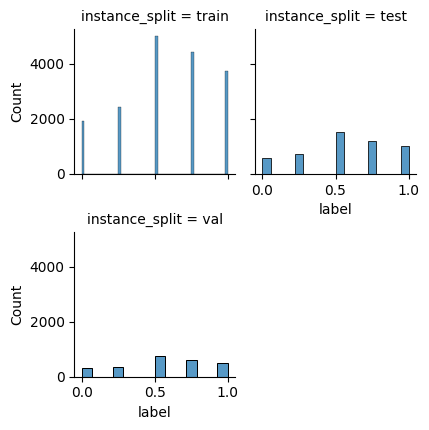

In [90]:
g = sns.FacetGrid(df_text[df_text['task'] == 'politeness'], col="instance_split", col_wrap=2, height=2.2)
g.map(sns.histplot, "label")